In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[:, 1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [7]:
# steps 

# 1.Preprocess + EDA + Feature Selection
# 2.Extract input and output columns
# 3.Scale the values 
# 4.Train test split
# 5.Train the model
# 6.Evaluate the model/model selection
# 7.Deploy the model

In [8]:
# EDA
import matplotlib.pyplot as plt

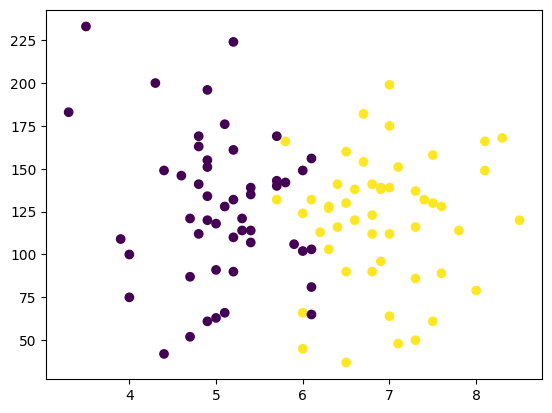

In [9]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [10]:
# scale the values
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [11]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [12]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [13]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [14]:
X_train.shape

(90, 2)

In [15]:
y_train.shape

(90,)

In [16]:
y_test.shape

(10,)

In [17]:
X_test.shape

(10, 2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[-0.9990651 ,  0.94448739],
       [-0.14758916,  0.42511551],
       [-0.23273676,  0.4498475 ],
       [ 1.38506753, -0.8856802 ],
       [ 0.448444  ,  0.87029141],
       [-0.74362232,  1.26600332],
       [-0.9990651 ,  0.40038351],
       [-0.74362232, -1.45451608],
       [ 0.87418197,  1.24127133],
       [-1.0842127 , -0.93514419],
       [ 0.27814881, -0.53943228],
       [-2.10598383,  2.67572701],
       [ 0.10785362, -1.47924807],
       [ 0.10785362,  0.17779556],
       [ 0.70388678, -0.86094821],
       [ 1.21477234,  0.17779556],
       [ 1.29991994,  0.12833157],
       [-1.0842127 , -1.800764  ],
       [-0.06244157, -0.4652363 ],
       [-0.48817954,  0.35091952],
       [ 0.70388678, -0.04479239],
       [ 0.78903437, -0.71255624],
       [-0.82876992, -0.16845236],
       [ 0.95932956, -1.89969198],
       [ 1.55536272, -0.26738034],
       [ 0.78903437,  0.35091952],
       [-0.48817954, -0.4405043 ],
       [ 1.29991994,  0.82082742],
       [-0.74362232,

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[ 0.78903437,  0.32618753],
       [-0.9990651 , -0.31684433],
       [-0.48817954, -0.26738034],
       [ 0.87418197,  0.35091952],
       [ 0.448444  , -0.86094821],
       [ 0.10785362,  0.77136343],
       [-0.57332713, -0.26738034],
       [ 0.448444  , -2.17174392],
       [ 0.70388678, -0.31684433],
       [ 0.19300121, -0.29211234]])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression()

In [26]:
# model training 
clf.fit(X_train, y_train)

LogisticRegression()

In [27]:
# evalute the model
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [28]:
y_test

11    1
59    0
41    0
32    1
79    1
8     0
46    0
82    1
93    1
99    1
Name: placement, dtype: int64

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred)

0.9

In [31]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

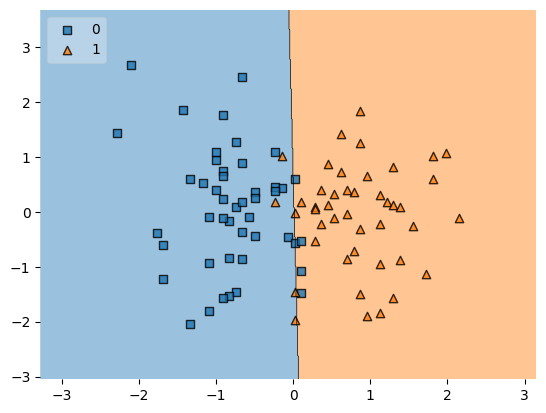

In [32]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [33]:
import pickle

In [34]:
pickle.dump(clf,open('model.pkl','wb'))